In [1]:
#Importing Libraries
import numpy as np #NumPy is a general-purpose array-processing package.
import pandas as pd #It contains high-level data structures and manipulation tools designed to make data analysis fast and easy.
import matplotlib.pyplot as plt #It is a Plotting Library
import seaborn as sns #Seaborn is a Python data visualization library based on matplotlib.
from sklearn.linear_model import LogisticRegression #Logistic Regression is a Machine Learning classification algorithm
from sklearn.linear_model import LinearRegression #Linear Regression is a Machine Learning classification algorithm
from sklearn.model_selection import train_test_split #Splitting of Dataset
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score


Reading the dataset



In [4]:
#reading the dataset
zomato_orgnl=pd.read_csv("C:/Users/ASHRITHA/Downloads/Zomato_reduced.csv")
zomato_orgnl.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,...,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),liked_food_from_review,menus_combined,location_latitude,location_longitude
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775.0,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,...,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,"['fried rice', 'soya chaap', 'kulcha', 'rice',...","['pasta,', 'lunch', 'buffet,', 'masala', 'papa...",12.915382,77.573638
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787.0,080 41714161,Banashankari,Casual Dining,...,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,"['chicken', 'fried rice', 'chicken biryan', 'c...","['momos,', 'lunch', 'buffet,', 'chocolate', 'n...",12.915382,77.573638
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918.0,+91 9663487993,Banashankari,"Cafe, Casual Dining",...,"Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,"['veggies', 'egg', 'pasta', 'cake', 'chocolate...","['churros,', 'cannelloni,', 'minestrone', 'sou...",12.915382,77.573638
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88.0,+91 9620009302,Banashankari,Quick Bites,...,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,"['pulka', 'apple', 'rice with sambar', 'dosa',...","['masala', 'dosa', 'pulka', 'apple', 'rice wit...",12.915382,77.573638
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166.0,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,...,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,"['roti', 'noodles', 'kulcha', 'pav bhaji', 'pa...","['panipuri,', 'gol', 'gappe', 'roti', 'noodles...",12.941726,77.575502


Deleting Unnnecessary Columns



In [5]:
#Deleting Unnnecessary Columns
zomato=zomato_orgnl.drop(['url','dish_liked','phone'],axis=1) 

In [7]:
#Removing the Duplicates
zomato.duplicated().sum()
zomato.drop_duplicates(inplace=True)


Remove the NaN values from the dataset



In [8]:
#Remove the NaN values from the dataset
zomato.isnull().sum()
zomato.dropna(how='any',inplace=True)
zomato.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4529 entries, 0 to 9252
Data columns (total 18 columns):
address                        4529 non-null object
name                           4529 non-null object
online_order                   4529 non-null object
book_table                     4529 non-null object
rate                           4529 non-null float64
votes                          4529 non-null float64
location                       4529 non-null object
rest_type                      4529 non-null object
cuisines                       4529 non-null object
approx_cost(for two people)    4529 non-null float64
reviews_list                   4529 non-null object
menu_item                      4529 non-null object
listed_in(type)                4529 non-null object
listed_in(city)                4529 non-null object
liked_food_from_review         4529 non-null object
menus_combined                 4529 non-null object
location_latitude              4529 non-null float64
locat

Changing the Columns Names



In [9]:
#Changing the Columns Names
zomato.columns
zomato = zomato.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'})
zomato.columns


Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city', 'liked_food_from_review', 'menus_combined',
       'location_latitude', 'location_longitude'],
      dtype='object')

Some Transformations



In [10]:
#Some Transformations
zomato['cost'] = zomato['cost'].astype(str)
zomato['cost'] = zomato['cost'].apply(lambda x: x.replace(',','.'))
zomato['cost'] = zomato['cost'].astype(float)
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4529 entries, 0 to 9252
Data columns (total 18 columns):
address                   4529 non-null object
name                      4529 non-null object
online_order              4529 non-null object
book_table                4529 non-null object
rate                      4529 non-null float64
votes                     4529 non-null float64
location                  4529 non-null object
rest_type                 4529 non-null object
cuisines                  4529 non-null object
cost                      4529 non-null float64
reviews_list              4529 non-null object
menu_item                 4529 non-null object
type                      4529 non-null object
city                      4529 non-null object
liked_food_from_review    4529 non-null object
menus_combined            4529 non-null object
location_latitude         4529 non-null float64
location_longitude        4529 non-null float64
dtypes: float64(5), object(13)
memory usag

Removing '/5' from Rates



Adjust the column names



In [12]:
# Adjust the column names
zomato.name = zomato.name.apply(lambda x:x.title())
zomato.online_order.replace(('Yes','No'),(True, False),inplace=True)
zomato.book_table.replace(('Yes','No'),(True, False),inplace=True)
zomato.cost.unique()


array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        750.,  200.,  850., 1200.,  150.,  350.,  250., 1500., 1300.,
       1000.,  100.,  900., 1100., 1600.,  950.,  230., 1700., 1350.,
       2200., 1400., 2000., 1800., 1900.,  180.,  330., 2500., 2100.,
       3000., 2800., 3400.,   40., 1250., 3500., 4000., 2400., 1450.,
       3200., 6000., 1050., 4100., 2300.,  120., 2600., 5000., 3700.,
       1650., 2700., 4500.])

Encode the input Variables



In [13]:
#Encode the input Variables
def Encode(zomato):
    for column in zomato.columns[~zomato.columns.isin(['rate', 'cost', 'votes'])]:
        zomato[column] = zomato[column].factorize()[0]
    return zomato

zomato_en = Encode(zomato.copy())

Get Correlation between different variables



Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city', 'liked_food_from_review', 'menus_combined',
       'location_latitude', 'location_longitude'],
      dtype='object')

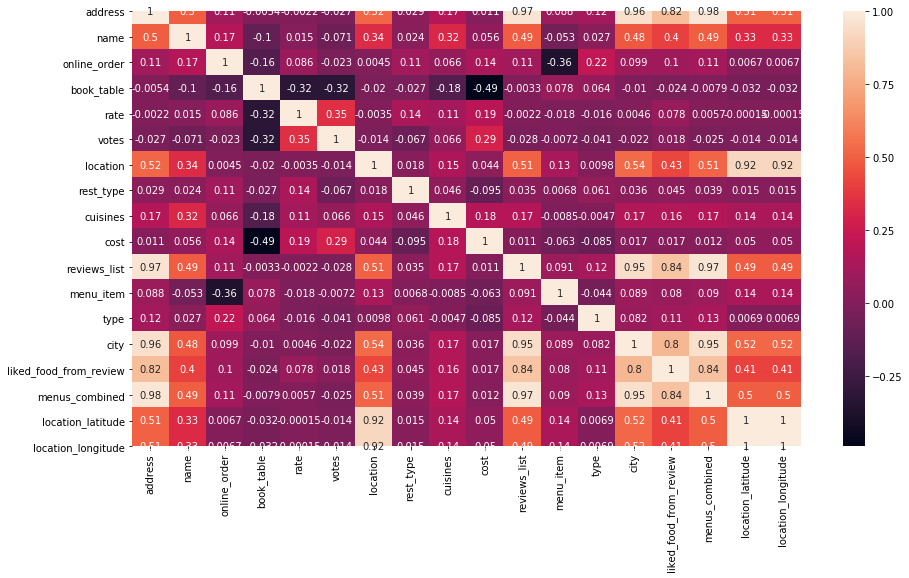

In [16]:
#Get Correlation between different variables
corr = zomato_en.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
zomato_en.columns


Defining the independent variables and dependent variables



In [15]:
#Defining the independent variables and dependent variables
x = zomato_en.iloc[:,[2,3,5,6,7,8,9,11]]
y = zomato_en['rate']
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)
x_train.head()
y_train.head()


2935    4.0
1236    4.4
4451    2.9
2498    4.2
4476    4.2
Name: rate, dtype: float64

Regression Analysis¶


Linear Regression¶


In [17]:
#Prepare a Linear REgression Model
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)


0.1387404813110601

Decision Tree Regression¶


In [18]:
#Prepairng a Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)


-0.49445685795930916

Random Forest Regression¶


In [21]:
#Preparing Random Forest REgression
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=500,random_state=329,min_samples_leaf=.0001)
RForest.fit(x_train,y_train)
y_predict=RForest.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)


0.2968291925031551

Extra Tree Regression¶


In [22]:
#Preparing Extra Tree Regression
from sklearn.ensemble import  ExtraTreesRegressor
ETree=ExtraTreesRegressor(n_estimators = 100)
ETree.fit(x_train,y_train)
y_predict=ETree.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)


0.24940420389630136

Data Visualization¶


Text(0.5, 1.0, 'Restaurants delivering online or Not')

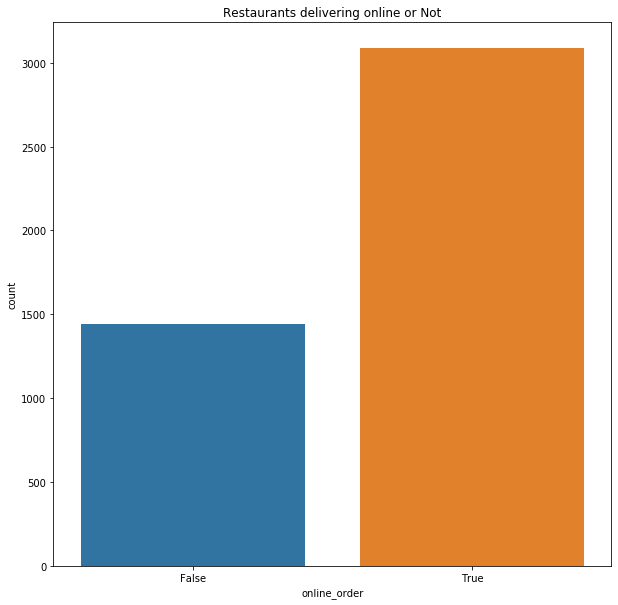

In [23]:
#Restaurants delivering Online or not
sns.countplot(zomato['online_order'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restaurants delivering online or Not')


Restaurants allowing table booking or not



Text(0.5, 1.0, 'Restaurants allowing table booking or not')

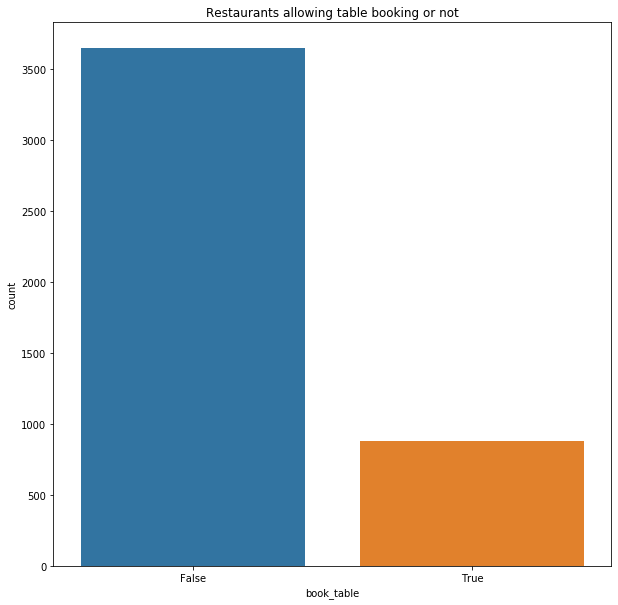

In [24]:
#Restaurants allowing table booking or not
sns.countplot(zomato['book_table'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restaurants allowing table booking or not')


Table booking Rate vs Rate



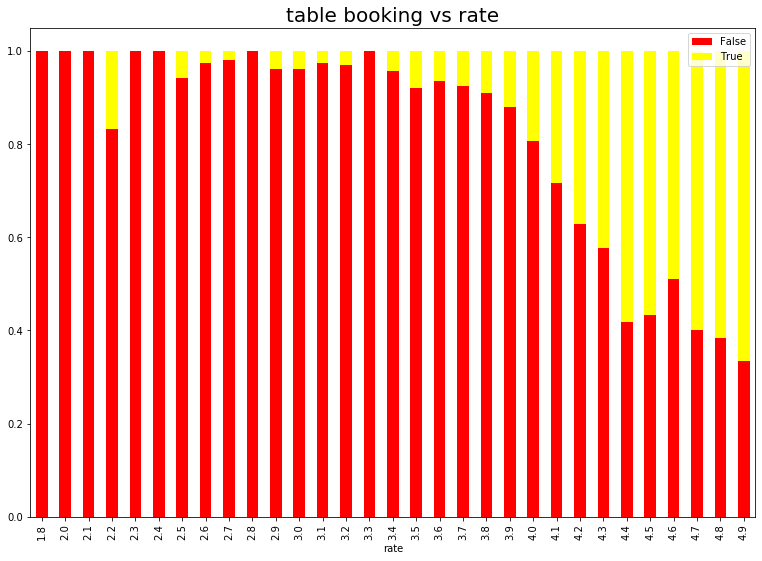

In [25]:
#Table booking Rate vs Rate
plt.rcParams['figure.figsize'] = (13, 9)
Y = pd.crosstab(zomato['rate'], zomato['book_table'])
Y.div(Y.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['red','yellow'])
plt.title('table booking vs rate', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()


Location



Text(0.5, 1.0, 'Location')

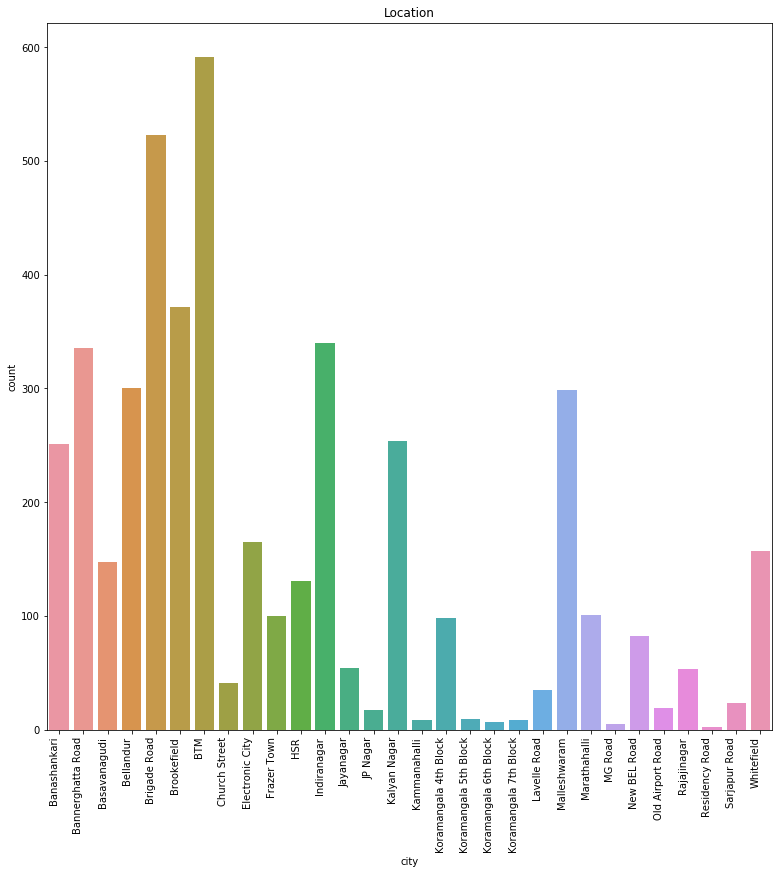

In [26]:
# Location
sns.countplot(zomato['city'])
sns.countplot(zomato['city']).set_xticklabels(sns.countplot(zomato['city']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(13,13)
plt.title('Location')


Location and Rating



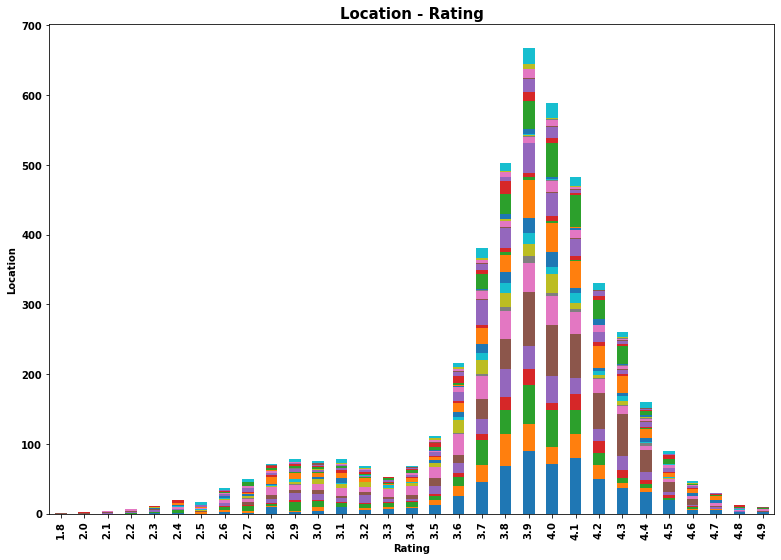

In [27]:
#Location and Rating
loc_plt=pd.crosstab(zomato['rate'],zomato['city'])
loc_plt.plot(kind='bar',stacked=True);
plt.title('Location - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Location',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.legend().remove();


Restaurant Type



Text(0.5, 1.0, 'Restuarant Type')

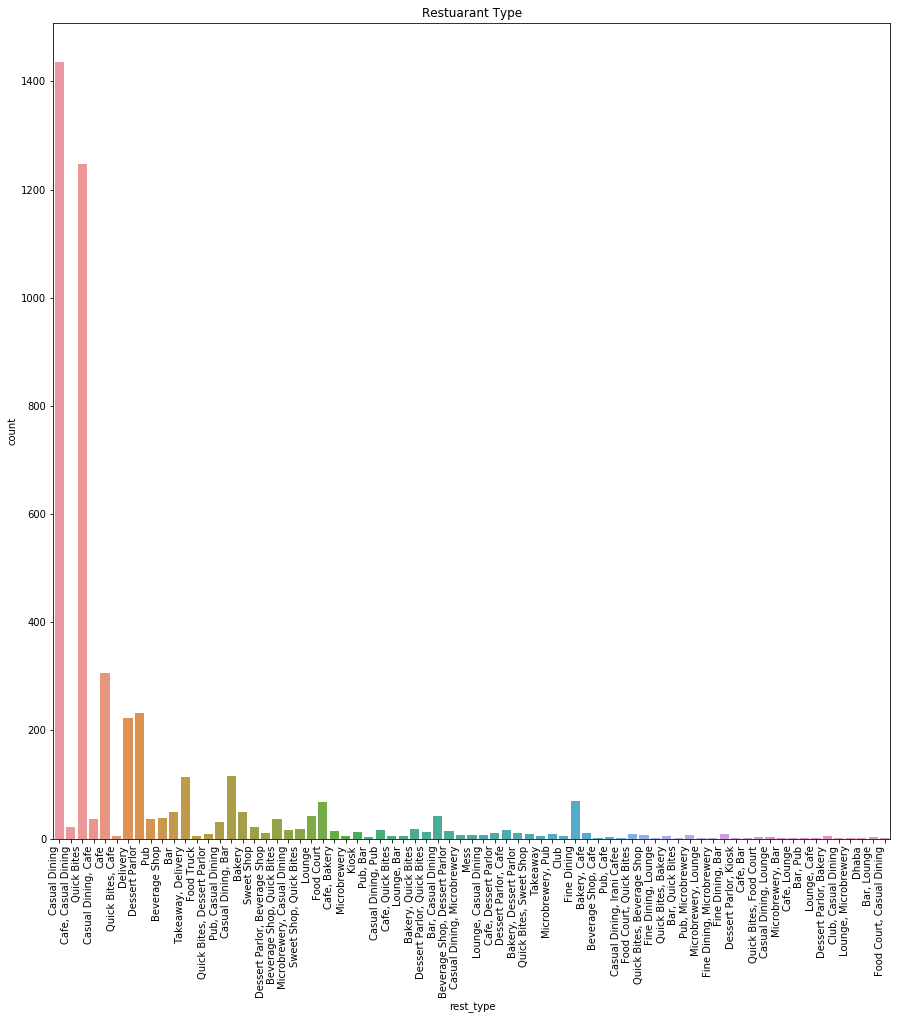

In [28]:
#Restaurant Type
sns.countplot(zomato['rest_type'])
sns.countplot(zomato['rest_type']).set_xticklabels(sns.countplot(zomato['rest_type']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Restuarant Type')


Gaussian Rest type and Rating



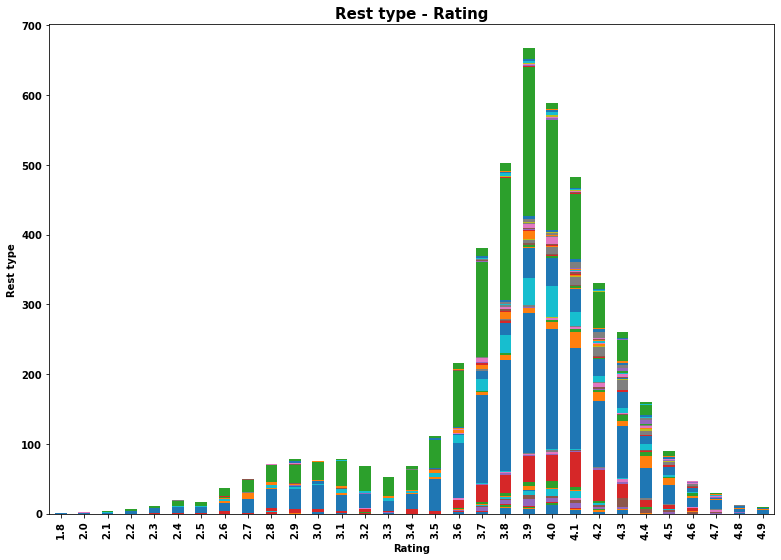

In [30]:
#Gaussian Rest type and Rating
loc_plt=pd.crosstab(zomato['rate'],zomato['rest_type'])
loc_plt.plot(kind='bar',stacked=True);
plt.title('Rest type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Rest type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.legend().remove();


Types of Services



Text(0.5, 1.0, 'Type of Service')

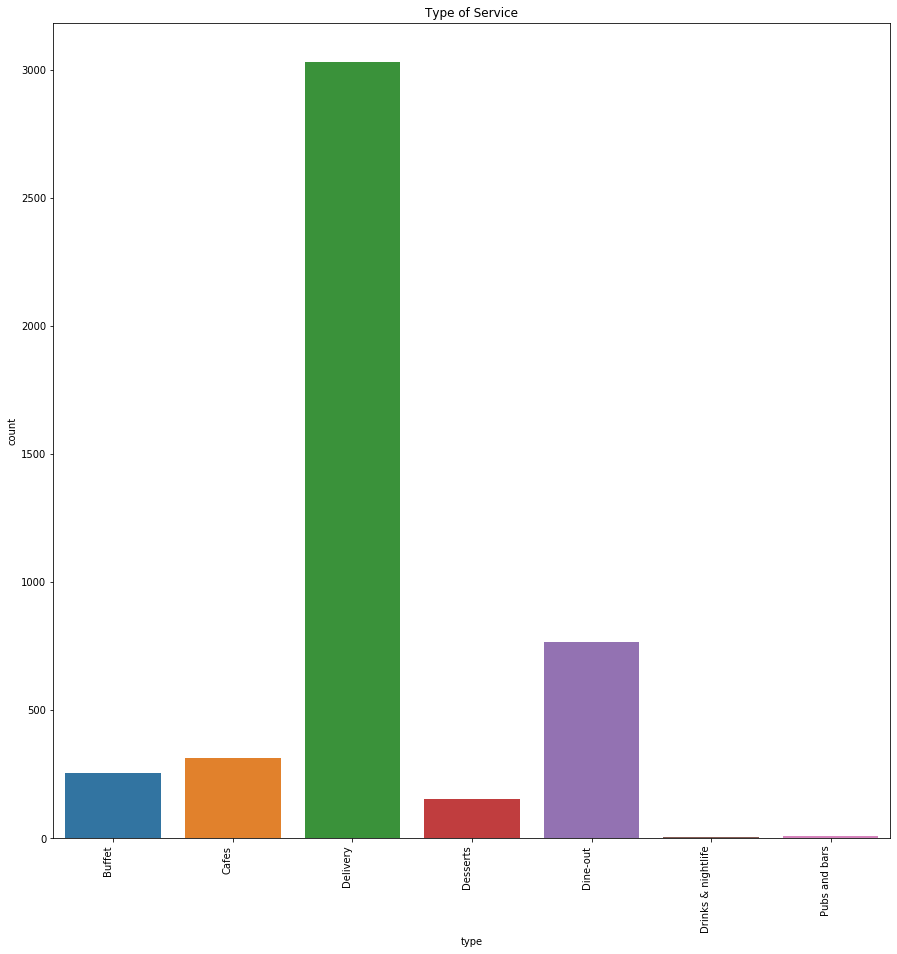

In [31]:
#Types of Services
sns.countplot(zomato['type'])
sns.countplot(zomato['type']).set_xticklabels(sns.countplot(zomato['type']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Type of Service')


Type and Rating



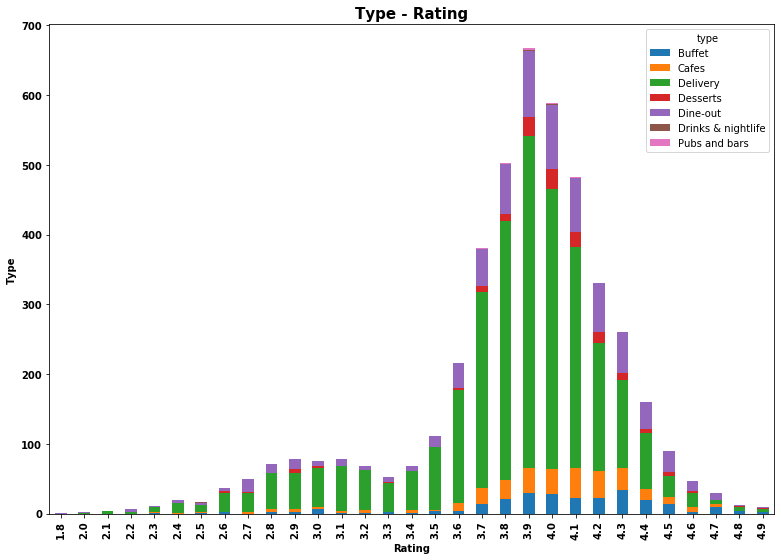

In [32]:
#Type and Rating
type_plt=pd.crosstab(zomato['rate'],zomato['type'])
type_plt.plot(kind='bar',stacked=True);
plt.title('Type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');


Cost of Restuarant



Text(0.5, 1.0, 'Cost of Restuarant')

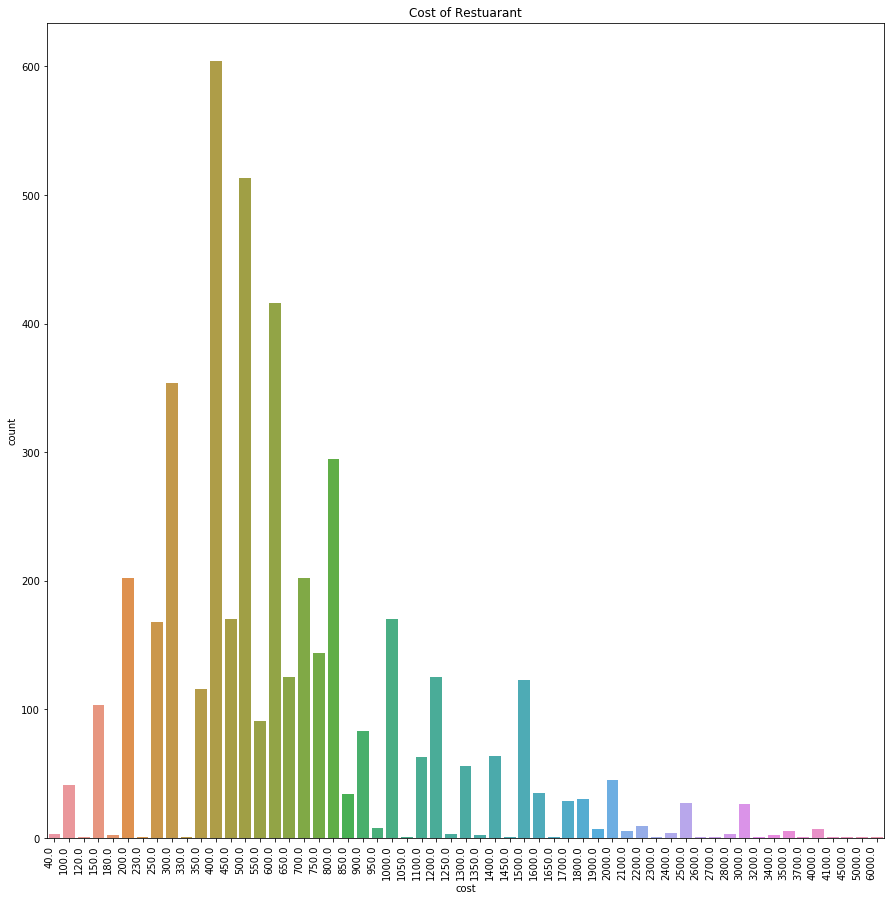

In [33]:
#Cost of Restuarant
sns.countplot(zomato['cost'])
sns.countplot(zomato['cost']).set_xticklabels(sns.countplot(zomato['cost']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Cost of Restuarant')


No. of restaurants in a Location',



Text(0.5, 1.0, 'NO. of restaurants in a Location')

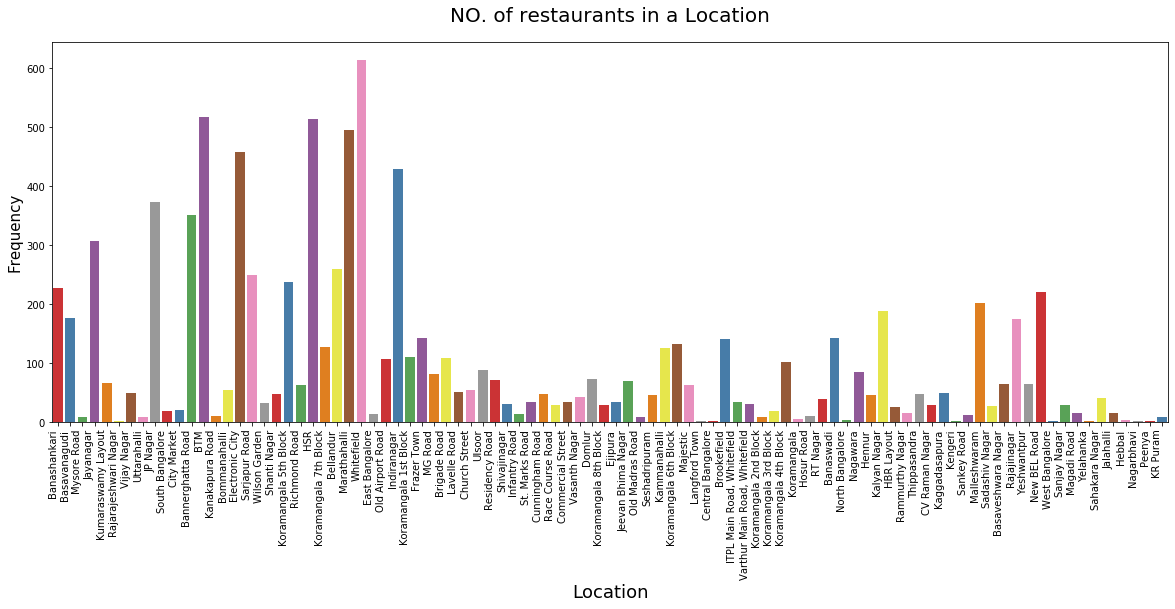

In [34]:
#NO. of restaurants in a Location',
fig = plt.figure(figsize=(20,7))
loc = sns.countplot(x="location",data=zomato_orgnl, palette = "Set1")
loc.set_xticklabels(loc.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Location",size=18)
loc
plt.title('NO. of restaurants in a Location',size = 20,pad=20)


Restaurant Type



Text(0.5, 1.0, 'Restaurant types')

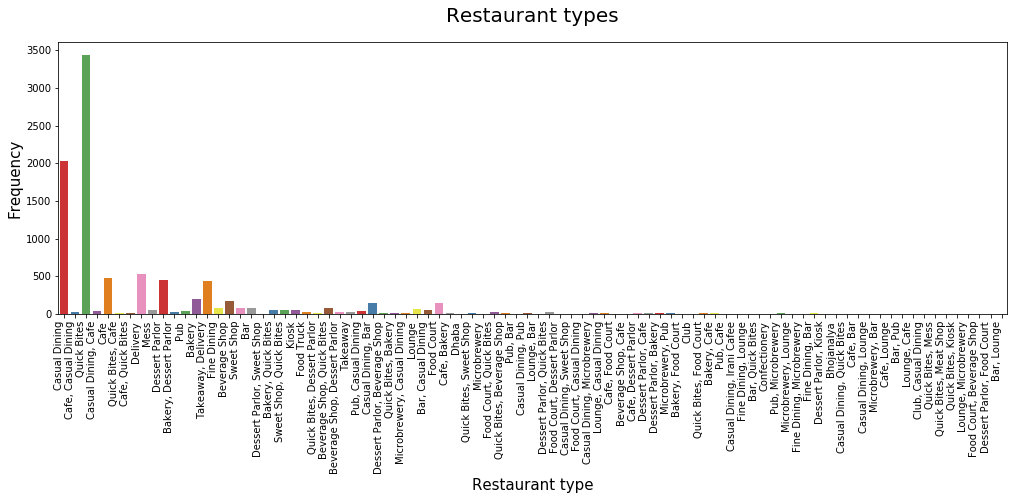

In [35]:
#Restaurant type
fig = plt.figure(figsize=(17,5))
rest = sns.countplot(x="rest_type",data=zomato_orgnl, palette = "Set1")
rest.set_xticklabels(rest.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Restaurant type",size=15)
rest 
plt.title('Restaurant types',fontsize = 20 ,pad=20)


Most famous restaurant chains in Bengaluru



Text(0.5, 0, 'Number of outlets')

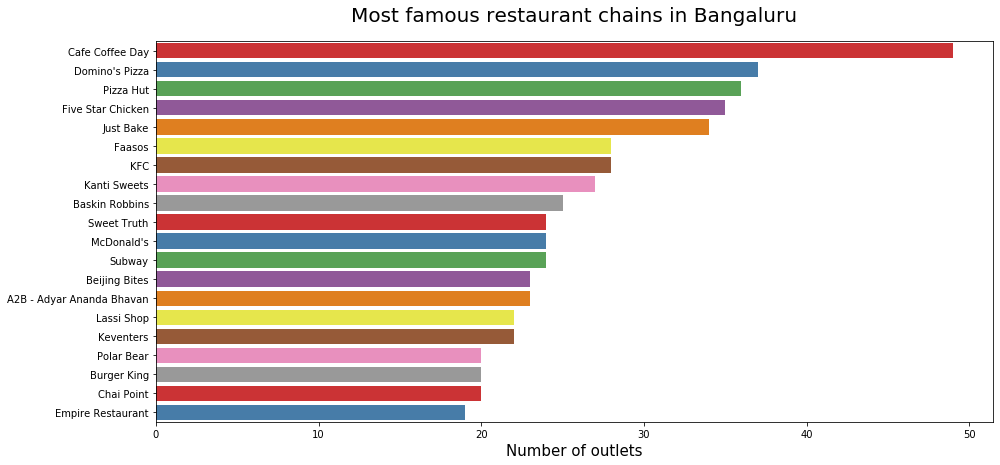

In [36]:
#Most famous restaurant chains in Bengaluru
plt.figure(figsize=(15,7))
chains=zomato_orgnl['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most famous restaurant chains in Bangaluru",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)
